In [ ]:
# Data - Removed Outliers

In [2]:
#Importing Libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/mandy/Documents/FTDS/Group_Project_02(Spotify)/genres_v2.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


# EDA AND CLEANING

In [4]:
df=df.drop(columns = ['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title'])
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap


In [5]:
X = df.drop(columns='genre')
y = df['genre']

In [6]:
numdf_o = X.astype(float)

In [7]:
numdf_i = pd.concat([numdf_o, y], axis=1)

In [8]:
#detecting outliers
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain True or False depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

drop_numerical_outliers(numdf_i)

# Modeling
## 1 - Decision Tree

In [49]:
X = numdf_i.drop(columns='genre')
y = numdf_i['genre']

In [50]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [51]:
# Import module for fitting
from sklearn.tree import DecisionTreeClassifier
dtreemodel = DecisionTreeClassifier()  #initialize

# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
dtreemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
dtreemodel.classes_

array(['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'], dtype=object)

In [53]:
# attribute of thr algorithm
dtreemodel.feature_importances_

array([0.096, 0.078, 0.022, 0.064, 0.006, 0.058, 0.047, 0.082, 0.039,
       0.065, 0.321, 0.123, 0.   ])

In [54]:
#Predicting the target for test data
predictions = dtreemodel.predict(X_test)

In [55]:
dtreemodel.score(X_test, y_test)

0.5772411953041622

In [19]:
from sklearn import tree
tree.plot_tree(dtreemodel)

gini = 0.5\nsamples = 2\nvalue = [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0\n0]'),
 Text(18.405444871118043, 75.77454545454546, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0\n0]'),
 Text(18.54625796544601, 82.36363636363637, 'X[5] <= 0.074\ngini = 0.667\nsamples = 6\nvalue = [2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0\n0]'),
 Text(18.49932026733669, 75.77454545454546, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(18.59319566355533, 75.77454545454546, 'X[2] <= 5.0\ngini = 0.64\nsamples = 5\nvalue = [1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0\n0]'),
 Text(18.54625796544601, 69.18545454545455, 'gini = 0.5\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0\n0]'),
 Text(18.640133361664656, 69.18545454545455, 'gini = 0.667\nsamples = 3\nvalue = [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0\n0]'),
 Text(19.015634946539233, 115.30909090909091, 'X[3] <= -11.319\ngini = 0.664\nsamples = 27\nvalue = [3, 0, 1, 0, 1, 0, 13

Error in callback <function flush_figures at 0x12266acb0> (for post_execute):


KeyboardInterrupt: 

## 2 - KNN

### Feature Scaling - MinMaxScaler

In [23]:
X = numdf_i.drop(columns='genre')
y = numdf_i['genre']

In [24]:
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
## maka an object
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
# compare the difference before and after rescaled
print('original data:')
print(X)
print("Rescaled data:")
print(rescaledX)

original data:
       danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814  2.0    -7.364   1.0       0.4200      0.059800   
1             0.719   0.493  8.0    -7.230   1.0       0.0794      0.401000   
2             0.850   0.893  5.0    -4.783   1.0       0.0623      0.013800   
4             0.798   0.624  2.0    -7.668   1.0       0.2930      0.217000   
5             0.721   0.568  0.0   -11.295   1.0       0.4140      0.045200   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693  4.0    -5.148   1.0       0.0304      0.031500   
42301         0.517   0.768  0.0    -7.922   0.0       0.0479      0.022500   
42302         0.361   0.821  8.0    -3.102   1.0       0.0505      0.026000   
42303         0.477   0.921  6.0    -4.777   0.0       0.0392      0.000551   
42304         0.529   0.945  9.0    -5.862   1.0       0.0615      0.001890   

       instrumentalness  liveness  v

#### Train the Model 

In [25]:
# splitting the data into training and test sets (80:20)
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(rescaledX,y,test_size=0.2,random_state=44)

In [26]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)  # setting the k from 1-25
scores = {}     # record the accuracy
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

scores

{1: 0.5248132337246532,
 2: 0.5004002134471718,
 3: 0.5272145144076841,
 4: 0.5372198505869797,
 5: 0.5441568836712913,
 6: 0.5444236926360726,
 7: 0.5494930629669157,
 8: 0.551760939167556,
 9: 0.554162219850587,
 10: 0.5612326574172892,
 11: 0.5584311632870864,
 12: 0.5588313767342583,
 13: 0.5605656350053362,
 14: 0.5644343649946638,
 15: 0.5639007470651014,
 16: 0.5636339381003201,
 17: 0.566435432230523,
 18: 0.5693703308431163,
 19: 0.5665688367129136,
 20: 0.5659018143009605,
 21: 0.5680362860192102,
 22: 0.5685699039487727,
 23: 0.5665688367129136,
 24: 0.5665688367129136,
 25: 0.5675026680896478}

Text(0, 0.5, 'Testing Accuracy')

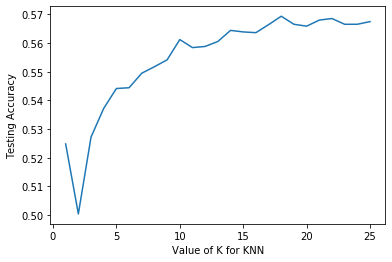

In [27]:
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Feature Scaling - Normailization

In [28]:
X = numdf_i.drop(columns='genre')
y = numdf_i['genre']

In [29]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
normalizedX = scaler.fit_transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print("Rescaled data:")
print(normalizedX)

Rescaled data:
[[6.673e-06 6.536e-06 1.606e-05 ... 1.261e-03 1.000e+00 3.212e-05]
 [3.204e-06 2.197e-06 3.565e-05 ... 5.128e-04 1.000e+00 1.782e-05]
 [8.601e-06 9.037e-06 5.060e-05 ... 2.207e-03 1.000e+00 4.048e-05]
 ...
 [1.537e-06 3.496e-06 3.407e-05 ... 6.598e-04 1.000e+00 1.703e-05]
 [1.476e-06 2.850e-06 1.856e-05 ... 4.642e-04 1.000e+00 1.238e-05]
 [3.262e-06 5.828e-06 5.550e-05 ... 9.561e-04 1.000e+00 2.467e-05]]


#### Train the Model 

In [31]:
# splitting the data into training and test sets (80:20)
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(normalizedX,y,test_size=0.2,random_state=44)

In [32]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)  # setting the k from 1-25
scores = {}     # record the accuracy
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

scores

{1: 0.41115261472785486,
 2: 0.3544557097118463,
 3: 0.3720651013874066,
 4: 0.3799359658484525,
 5: 0.37913553895410884,
 6: 0.3783351120597652,
 7: 0.3783351120597652,
 8: 0.37566702241195304,
 9: 0.3784685165421558,
 10: 0.3812700106723586,
 11: 0.38233724653148343,
 12: 0.3866061899679829,
 13: 0.384204909284952,
 14: 0.3844717182497332,
 15: 0.37940234791889005,
 16: 0.3828708644610459,
 17: 0.3831376734258271,
 18: 0.384204909284952,
 19: 0.38073639274279614,
 20: 0.384204909284952,
 21: 0.3860725720384205,
 22: 0.38167022411953044,
 23: 0.381803628601921,
 24: 0.38167022411953044,
 25: 0.3783351120597652}

Text(0, 0.5, 'Testing Accuracy')

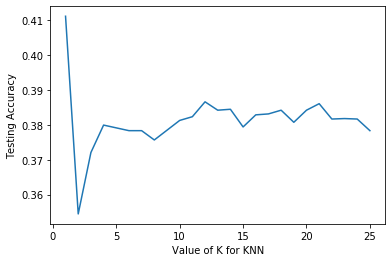

In [33]:
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## 3 - Random Forest

In [35]:
X = numdf_i.drop(columns='genre')
y = numdf_i['genre']

In [36]:
# splitting the data into training and test sets (80:20)
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=44)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=800, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.5997865528281751


##  4 - AdaBoost

In [40]:
X = numdf_i.drop(columns='genre')
y = numdf_i['genre']

In [41]:
# splitting the data into training and test sets (80:20)
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=44)

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.01, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=200, random_state=42)

In [43]:
from sklearn.metrics import accuracy_score
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.48359124866595515


## 5 - XGBoost

In [56]:
X = numdf_i.drop(columns='genre')
y = numdf_i['genre']

In [57]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [58]:
import xgboost
xgmodel = xgboost.XGBClassifier()

# Fit the model using the training data
xgmodel.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [59]:
y_pred = xgmodel.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6814300960512273
